# Customer Purchase Intent Prediction Using Behaviour Analysis

## Data Source:
http://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

## Business Case:
The main goal of this project is to design a machine learning classification system, that is able to predict an online shopper's intention ( buy or no buy ), based on the values of the given features.

In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

### Loading the data

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

## Domain Analysis

### Basic understanding of features

## Basic Checks

In [3]:
df.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


In [4]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [5]:
df.shape

(12330, 18)

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Data cleaning


In [8]:
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


### Data Type Fix

#### We will transform Revenue & Weekend features from boolean into binary, so that we can easily use them in our later calculations.

In [9]:
df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')

#### Now, let's check dataset info:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

#### Both Revenue and Weekend has been transformed into binary (0's and 1's).

## EDA

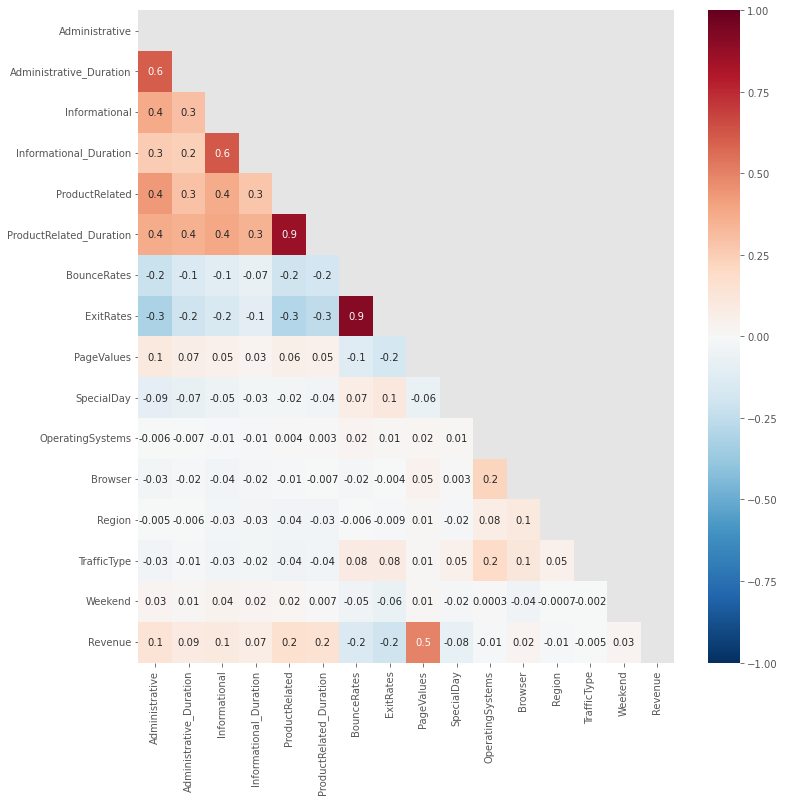

In [11]:
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

From the above heatmap, we observe the following:

* In general, there is very little correlation among the different features in our dataset.
* The very few cases of high correlation (|corr| >= 0.7) are:
    * BounceRates & ExitRates (0.9).
      * ProductRelated & ProductRelated_Duration (0.9).
* Moderate Correlations (0.3 < |corr| < 0.7):
     * Among the following features: Administrative, Administrative_Duration, Informational, Informational_Duration,      ProductRelated, and ProductRelated_Duration.
   * Also between PageValues and Revenue.

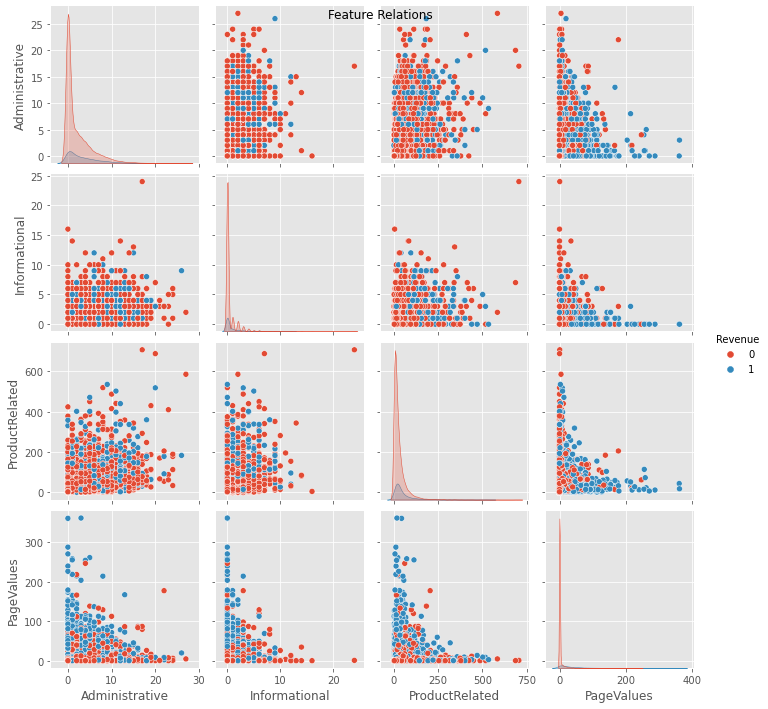

In [12]:
g1 = sns.pairplot(df[['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'Revenue']], hue='Revenue')
g1.fig.suptitle('Feature Relations')
plt.show()

* From the above figure, we can see:

* No strong correlation between Revenue (our target) and any other feature.
* A strong negative correlation between PageValues and other features shown.

### Web page Analysis

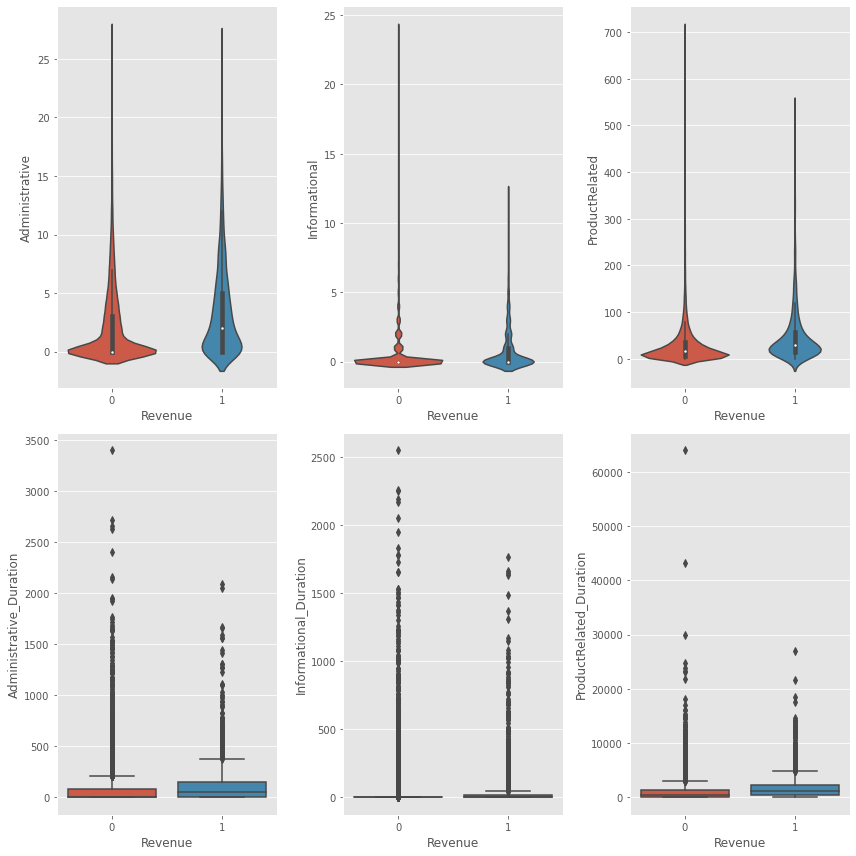

In [13]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=df, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.violinplot(data=df, x = 'Revenue', y = 'Informational', ax=ax2)
sns.violinplot(data=df, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.boxplot(data=df, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.boxplot(data=df, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.boxplot(data=df, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)

plt.tight_layout()
plt.show()

From the above boxplots, we can see that:

* In general, visitors tend to visit less pages, and spend less time, if they are not going to make a purchase.
* The number of product related pages, and the time spent on them, is way higher than that for account related or informational pages.
* The first 3 feature look like they follow a skewed normal distribution.

### Page Metrics Analysis

C:\Users\Hp\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

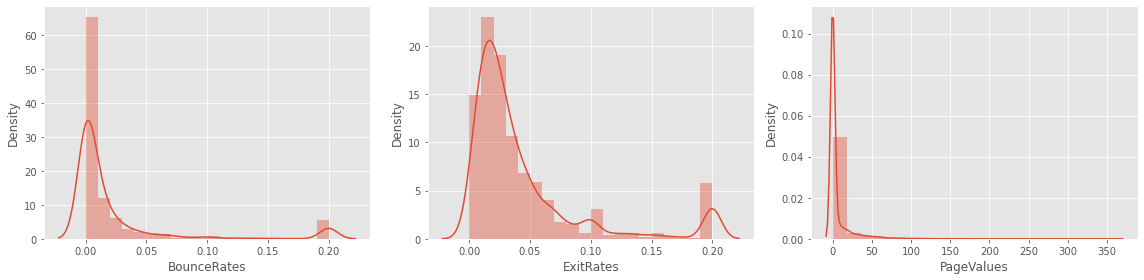

In [14]:
fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.distplot(df['BounceRates'], bins=20, ax=ax1)
sns.distplot(df['ExitRates'], bins=20, ax=ax2)
sns.distplot(df['PageValues'], bins=20, ax=ax3)

plt.tight_layout()
plt.show()

From the above visualizations of 3 google analytics metrics, we can conclude:

* BounceRates & PageValues do not follow a normal distribution.
* All 3 features have distributions that are skewed right.
* All 3 distributions have a lot of outliers.
* Exit rate has more high values than bounce rate, which makes sense, where transaction confirmation pages for example will cause the average exit rate to increase.
* Bounce rate ==> the percentage where the first page visited was the only page visited in that session.
* Exit rate of a page ==> The percentage where that page was the last page visited in the session, out of all visits to that page.

### Visitor Analysis

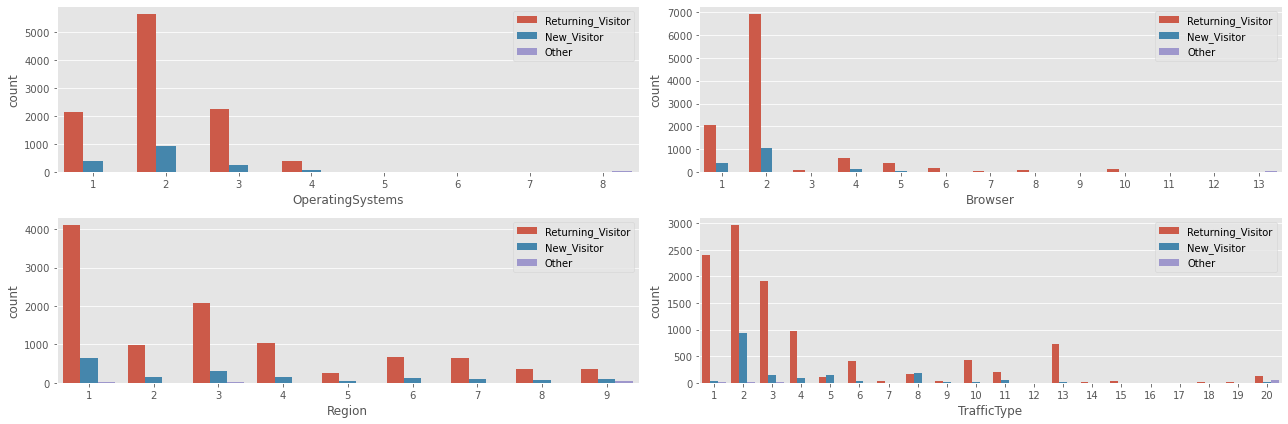

In [15]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df, x='OperatingSystems', hue='VisitorType', ax=ax1)
sns.countplot(data=df, x='Browser', hue='VisitorType', ax=ax2)
sns.countplot(data=df, x='Region', hue='VisitorType', ax=ax3)
sns.countplot(data=df, x='TrafficType', hue='VisitorType', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

* 1 Operating system is responsible for ~7000 of the examples in our dataset.
* 4 of the 8 operating systems used, are responsible of a very small number (<200) of the examples in our dataset.
* It looks like we have a very regionally diverse traffic in our dataset.
* Also Traffic sources are very diverse, with a few that did not contribute much to the dataset.

### Visit Date Analysis

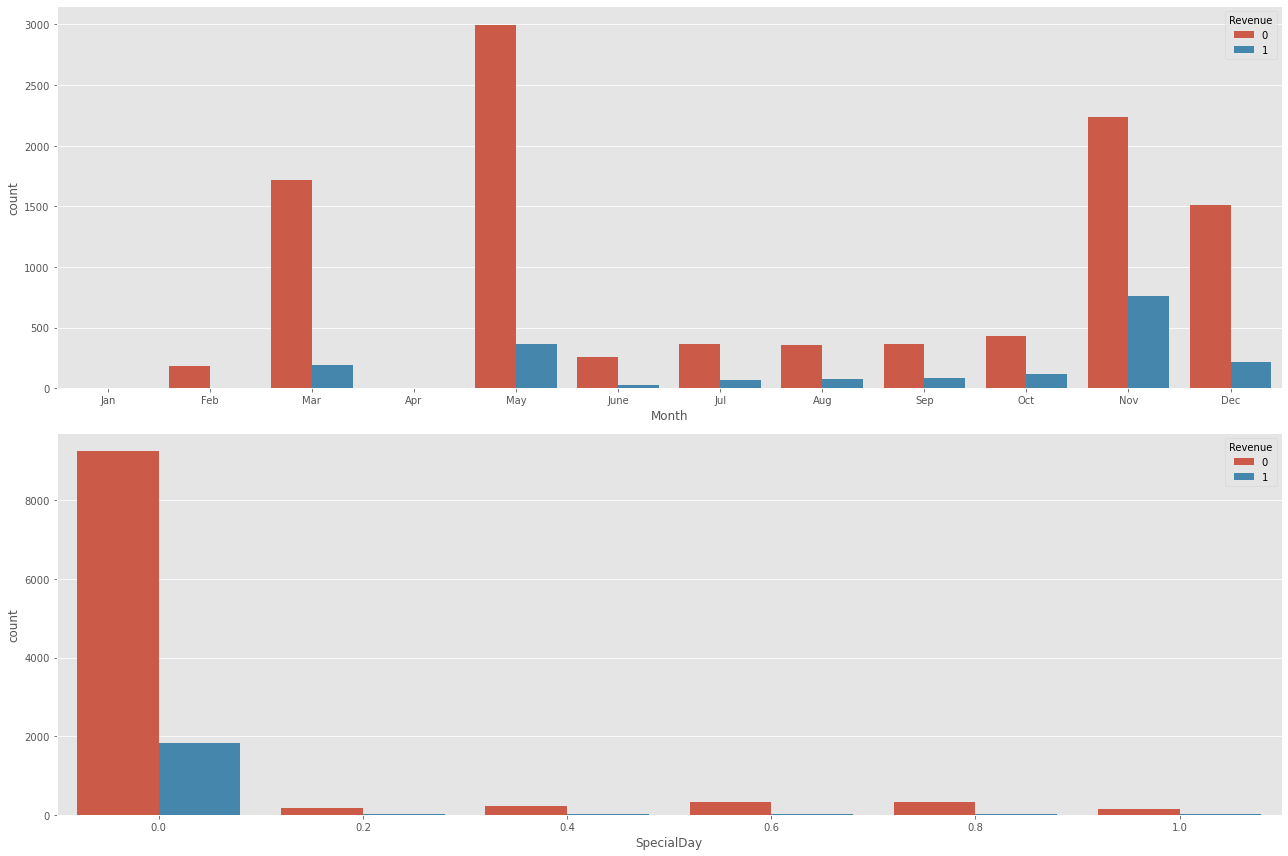

In [16]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=df, x='Month', hue='Revenue', ax=ax1, order=orderlist)
sns.countplot(data=df, x='SpecialDay', hue='Revenue', ax=ax2)

plt.tight_layout()
plt.show()

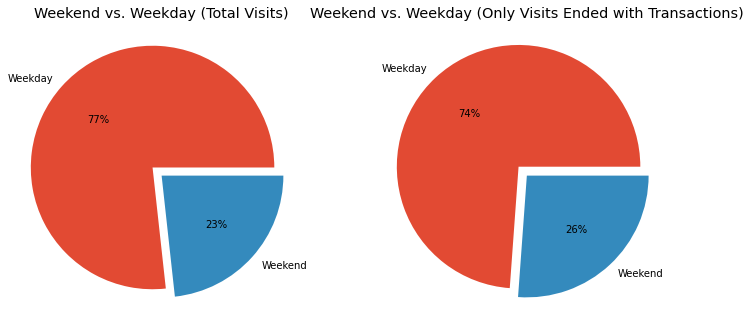

In [17]:
fig, ax = plt.subplots(1, 2,figsize=(12, 6), subplot_kw=dict(aspect="equal"))
ax[0].pie(df['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[0].set_title('Weekend vs. Weekday (Total Visits)')
ax[1].pie(df[df['Revenue'] == 1]['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[1].set_title('Weekend vs. Weekday (Only Visits Ended with Transactions)')
#fig.suptitle('Weekend Visits')
plt.show()

* On March and May, we have a lot of visits (May is the month with the highest number of visits), yet transactions made during those 2 months are not on the same level.
* We have no visits at all during Jan nor Apr.
* Most transactions happen during the end of the year, with Nov as the month with the highest number of confirmed transactions.
* The closer the visit date to a special day (like black Friday, new year's, ... etc) the more likely it will end up in a transaction.
* It does not look like weekends affect the number of visits or transactions much, we can see only a slight increase in the number of transactions happening on weekends compared to those on weekdays.

### Finding Important Features then Removing from Dataframe

In [18]:
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
list_one =[]
feature_ranking = SelectKBest(chi2, k=5)
fit = feature_ranking.fit(X, Y)

fmt = '%-8s%-20s%s'

for i, (score, feature) in enumerate(zip(feature_ranking.scores_, X.columns)):
    list_one.append((score, feature))
    
dfObj = pd.DataFrame(list_one) 
dfObj.sort_values(by=[0], ascending = False)

NameError: name 'X' is not defined

In [19]:
X_rc.drop(['Aug','TrafficType','OperatingSystems','Other','Jul'],axis=1,inplace=True)

NameError: name 'X_rc' is not defined

In [20]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_rc,Y,test_size=.2)

NameError: name 'X_rc' is not defined

### Data Preprocessing

In this section we will make our data ready for model training. This will include:

* Transform Month and VisitorType columns into numerical (binary) values.
* Split data set into training, validation, and testing parts (80/20), while separating Revenue column, where it will be used as our labels.
* We will ably feature scaling on our input data, in order to be used for Naive Bayes and SVM model training.

### Data Transformation

In [21]:
dff = pd.concat([df,pd.get_dummies(df['Month'], prefix='Month')], axis=1).drop(['Month'],axis=1)
dff = pd.concat([dff,pd.get_dummies(dff['VisitorType'], prefix='VisitorType')], axis=1).drop(['VisitorType'],axis=1)
print(dff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [22]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


## Data Split

In [23]:
y = dff['Revenue']
X = dff.drop(['Revenue'], axis=1)

In [24]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=101)

Now we have the following data subsets:

* Train data (X_train) and trin labels (y_train) ==> 80%
* Test data (X_test) and test labels (y)test) ==> 20%

### Data Scaling

We will scale the features in our subsets, in order to use them to train, validate, and test models that will benefit from feature scaling.

In [25]:
sc_X = StandardScaler()

Xsc_train = sc_X.fit_transform(X_train)
Xsc_val = sc_X.fit_transform(X_val)
Xsc_test = sc_X.fit_transform(X_test)

## Model Building

## Knn

* For K-Nearest Neighbor classifier, we will be using the scaled version of our dataset.

* KNN is a non-parametric (no assumption for underlying data distribution) learning algorithm, the model structure determined from the dataset. This will be very helpful in dataset where many features do not follow a specific theoretical assumption.

In [26]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',leaf_size=30,p=2) #default values
knn.fit(Xsc_train,y_train)
knn_pred = knn.predict(Xsc_val)

print('K-Nearest Neighbor Initial Performance:')
print('---------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, knn_pred))
print('F1 Score        : ', metrics.f1_score(y_val, knn_pred))
print('Precision       : ', metrics.precision_score(y_val, knn_pred))
print('Recall          : ', metrics.recall_score(y_val, knn_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, knn_pred))

K-Nearest Neighbor Initial Performance:
---------------------------------------
Accuracy        :  0.8734451054624122
F1 Score        :  0.5021276595744681
Precision       :  0.7283950617283951
Recall          :  0.38311688311688313
Confusion Matrix:
  [[1497   44]
 [ 190  118]]


Compared to Naive Bayes, KNN's initial model causes a considerable increase in accuracy and F1 score, with a decrease in recall. Now we will try increase its performance even more with hyper-parameter tuning via grid search.

### Knn Tuning

The following KNN parameters will be tuned:

* leaf_size: Leaf size can affect the speed and the memory required to store the tree.
* n_neighbors: Number of neighbors to use
* p: determines the distance metric to be used: p=1 ==> manhattan_distance, and p=2 ==> euclidean_distance
* weights: weight function used in prediction

In [27]:
knn_param_grid = {'n_neighbors': list(range(1,30)), 
                  'leaf_size': [1,10,20,30,40,50], 
                  'p': [1,2],
                  'weights': ['uniform','distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(),
                        knn_param_grid,
                        verbose=3)

In [28]:
knn_grid.fit(Xsc_train,y_train)

Fitting 5 folds for each of 696 candidates, totalling 3480 fits
[CV 1/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.828 total time=   0.3s
[CV 2/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.845 total time=   0.3s
[CV 3/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.849 total time=   0.3s
[CV 4/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.849 total time=   0.3s
[CV 5/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.848 total time=   0.3s
[CV 1/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.828 total time=   0.2s
[CV 2/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.845 total time=   0.3s
[CV 3/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.849 total time=   0.3s
[CV 4/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.849 total time=   0.3s
[CV 5/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.848 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 10, 20, 30, 40, 50],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=3)

In [30]:
knn_grid.best_params_

{'leaf_size': 1, 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}

In [31]:
knn_grid.best_estimator_

KNeighborsClassifier(leaf_size=1, n_neighbors=8, p=1, weights='distance')

In [32]:
knn_grid_pred = knn_grid.predict(Xsc_val)

In [33]:
print('K-Nearest Neighbor Tuned Performance:')
print('-------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, knn_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, knn_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, knn_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, knn_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, knn_grid_pred))

K-Nearest Neighbor Tuned Performance:
-------------------------------------
Accuracy        :  0.8674959437533802
F1 Score        :  0.44191343963553537
Precision       :  0.7404580152671756
Recall          :  0.31493506493506496
Confusion Matrix:
  [[1507   34]
 [ 211   97]]


We can see that a very slight change occured to KNN's performance after hyper-parameters tuning.

## SVM

For SVM classifier, we will be using the scaled version of our dataset.

SVM offers high accuracy classification, and it is known for its kernel trick to handle nonlinear input spaces. The classifier separates data points using a hyperplane with the largest amount of margin. SVM finds an optimal hyperplane which helps in classifying new data points.

In [34]:
svm = SVC(C=1.0,kernel='rbf',degree=3,gamma='auto_deprecated') #default values
svm.fit(Xsc_train,y_train)
svm_pred = svm.predict(Xsc_val)

print('SVM Initial Performance:')
print('------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, svm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, svm_pred))
print('Precision       : ', metrics.precision_score(y_val, svm_pred))
print('Recall          : ', metrics.recall_score(y_val, svm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, svm_pred))

ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got ''auto_deprecated'' instead.

## SVM Tuning

In [35]:
svm_param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [0.1,0.01,0.001,0.0001], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 
svm_grid = GridSearchCV(SVC(),
                        svm_param_grid,
                        refit=True,
                        verbose=3)

In [ ]:
svm_grid.fit(Xsc_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.880 total time=   1.8s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.887 total time=   1.8s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.885 total time=   1.9s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.887 total time=   2.1s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.885 total time=   2.2s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.880 total time=   2.2s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.881 total time=   2.2s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.884 total time=   3.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.890 total time=   2.9s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.882 total time=   2.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   3.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

In [29]:
svm_grid.best_params_

NameError: name 'svm_grid' is not defined

In [ ]:
svm_grid.best_estimator_

In [30]:
svm_grid = SVC(C=10,kernel='rbf',degree=3,gamma=0.01) #default values
svm_grid.fit(Xsc_train,y_train)

svm_grid_pred = svm_grid.predict(Xsc_val)

print('SVM Tuned Performance:')
print('----------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, svm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, svm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, svm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, svm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, svm_grid_pred))

SVM Tuned Performance:
----------------------
Accuracy        :  0.8891292590589508
F1 Score        :  0.6003898635477583
Precision       :  0.751219512195122
Recall          :  0.5
Confusion Matrix:
  [[1490   51]
 [ 154  154]]


## Logistic Regression

Logistic regression measures the relationship between the categorical dependent variable and the independent variables by estimating probabilities using a logistic/sigmoid function.

In [31]:
lrm = LogisticRegression(C=1.0,solver='lbfgs',) #default parameters
lrm.fit(X_train,y_train)
lrm_pred = lrm.predict(X_val)

print('Logistic Regression initial Performance:')
print('----------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, lrm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, lrm_pred))
print('Precision       : ', metrics.precision_score(y_val, lrm_pred))
print('Recall          : ', metrics.recall_score(y_val, lrm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, lrm_pred))

Logistic Regression initial Performance:
----------------------------------------
Accuracy        :  0.8772309356408869
F1 Score        :  0.5221052631578947
Precision       :  0.7425149700598802
Recall          :  0.4025974025974026
Confusion Matrix:
  [[1498   43]
 [ 184  124]]


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Logistic Regression Tuning

In [32]:
lrm_param_grid = {'C': [0.01, 0.1, 1, 10, 100],  
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']} 
lrm_grid = GridSearchCV(LogisticRegression(),
                        lrm_param_grid,
                        refit=True,
                        verbose=3)

In [33]:
lrm_grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..........C=0.01, solver=newton-cg;, score=0.877 total time=   0.6s
[CV 2/5] END ..........C=0.01, solver=newton-cg;, score=0.882 total time=   0.4s
[CV 3/5] END ..........C=0.01, solver=newton-cg;, score=0.884 total time=   0.6s
[CV 4/5] END ..........C=0.01, solver=newton-cg;, score=0.881 total time=   0.5s
[CV 5/5] END ..........C=0.01, solver=newton-cg;, score=0.877 total time=   0.4s
[CV 1/5] END ..............C=0.01, solver=lbfgs;, score=0.877 total time=   0.0s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

[CV 2/5] END ..............C=0.01, solver=lbfgs;, score=0.882 total time=   0.0s
[CV 3/5] END ..............C=0.01, solver=lbfgs;, score=0.883 total time=   0.0s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

[CV 4/5] END ..............C=0.01, solver=lbfgs;, score=0.881 total time=   0.0s
[CV 5/5] END ..............C=0.01, solver=lbfgs;, score=0.878 total time=   0.0s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ................C=0.01, solver=sag;, score=0.854 total time=   0.4s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ................C=0.01, solver=sag;, score=0.848 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ................C=0.01, solver=sag;, score=0.848 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ................C=0.01, solver=sag;, score=0.853 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ................C=0.01, solver=sag;, score=0.870 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...............C=0.01, solver=saga;, score=0.848 total time=   0.4s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...............C=0.01, solver=saga;, score=0.842 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...............C=0.01, solver=saga;, score=0.846 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...............C=0.01, solver=saga;, score=0.848 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...............C=0.01, solver=saga;, score=0.857 total time=   0.4s
[CV 1/5] END ...........C=0.1, solver=newton-cg;, score=0.879 total time=   0.6s
[CV 2/5] END ...........C=0.1, solver=newton-cg;, score=0.882 total time=   0.6s
[CV 3/5] END ...........C=0.1, solver=newton-cg;, score=0.883 total time=   0.5s
[CV 4/5] END ...........C=0.1, solver=newton-cg;, score=0.880 total time=   0.5s
[CV 5/5] END ...........C=0.1, solver=newton-cg;, score=0.882 total time=   0.5s
[CV 1/5] END ...............C=0.1, solver=lbfgs;, score=0.873 total time=   0.0s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

[CV 2/5] END ...............C=0.1, solver=lbfgs;, score=0.882 total time=   0.0s
[CV 3/5] END ...............C=0.1, solver=lbfgs;, score=0.881 total time=   0.0s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

[CV 4/5] END ...............C=0.1, solver=lbfgs;, score=0.882 total time=   0.0s
[CV 5/5] END ...............C=0.1, solver=lbfgs;, score=0.877 total time=   0.0s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .................C=0.1, solver=sag;, score=0.854 total time=   0.4s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .................C=0.1, solver=sag;, score=0.848 total time=   0.4s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .................C=0.1, solver=sag;, score=0.848 total time=   0.4s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .................C=0.1, solver=sag;, score=0.853 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .................C=0.1, solver=sag;, score=0.870 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ................C=0.1, solver=saga;, score=0.848 total time=   0.4s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ................C=0.1, solver=saga;, score=0.842 total time=   0.5s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ................C=0.1, solver=saga;, score=0.846 total time=   0.4s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ................C=0.1, solver=saga;, score=0.848 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ................C=0.1, solver=saga;, score=0.857 total time=   0.4s
[CV 1/5] END .............C=1, solver=newton-cg;, score=0.881 total time=   0.8s
[CV 2/5] END .............C=1, solver=newton-cg;, score=0.884 total time=   0.8s
[CV 3/5] END .............C=1, solver=newton-cg;, score=0.885 total time=   0.7s
[CV 4/5] END .............C=1, solver=newton-cg;, score=0.881 total time=   0.7s
[CV 5/5] END .............C=1, solver=newton-cg;, score=0.882 total time=   0.8s
[CV 1/5] END .................C=1, solver=lbfgs;, score=0.878 total time=   0.0s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

[CV 2/5] END .................C=1, solver=lbfgs;, score=0.881 total time=   0.0s
[CV 3/5] END .................C=1, solver=lbfgs;, score=0.885 total time=   0.0s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

[CV 4/5] END .................C=1, solver=lbfgs;, score=0.881 total time=   0.0s
[CV 5/5] END .................C=1, solver=lbfgs;, score=0.877 total time=   0.0s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...................C=1, solver=sag;, score=0.854 total time=   0.4s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...................C=1, solver=sag;, score=0.848 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...................C=1, solver=sag;, score=0.848 total time=   0.4s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...................C=1, solver=sag;, score=0.853 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...................C=1, solver=sag;, score=0.870 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..................C=1, solver=saga;, score=0.848 total time=   0.4s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..................C=1, solver=saga;, score=0.842 total time=   0.5s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..................C=1, solver=saga;, score=0.846 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..................C=1, solver=saga;, score=0.848 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..................C=1, solver=saga;, score=0.857 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 1/5] END ............C=10, solver=newton-cg;, score=0.881 total time=   1.0s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END ............C=10, solver=newton-cg;, score=0.885 total time=   1.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 3/5] END ............C=10, solver=newton-cg;, score=0.886 total time=   1.2s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 4/5] END ............C=10, solver=newton-cg;, score=0.882 total time=   1.2s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END ............C=10, solver=newton-cg;, score=0.884 total time=   1.5s
[CV 1/5] END ................C=10, solver=lbfgs;, score=0.878 total time=   0.1s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

[CV 2/5] END ................C=10, solver=lbfgs;, score=0.884 total time=   0.1s
[CV 3/5] END ................C=10, solver=lbfgs;, score=0.885 total time=   0.1s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

[CV 4/5] END ................C=10, solver=lbfgs;, score=0.883 total time=   0.1s
[CV 5/5] END ................C=10, solver=lbfgs;, score=0.876 total time=   0.1s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..................C=10, solver=sag;, score=0.854 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..................C=10, solver=sag;, score=0.848 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..................C=10, solver=sag;, score=0.848 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..................C=10, solver=sag;, score=0.853 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..................C=10, solver=sag;, score=0.870 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .................C=10, solver=saga;, score=0.848 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .................C=10, solver=saga;, score=0.842 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .................C=10, solver=saga;, score=0.846 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .................C=10, solver=saga;, score=0.848 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .................C=10, solver=saga;, score=0.857 total time=   0.4s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...........C=100, solver=newton-cg;, score=0.882 total time=   0.9s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...........C=100, solver=newton-cg;, score=0.884 total time=   1.0s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...........C=100, solver=newton-cg;, score=0.885 total time=   0.9s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...........C=100, solver=newton-cg;, score=0.884 total time=   0.9s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative

[CV 5/5] END ...........C=100, solver=newton-cg;, score=0.884 total time=   1.4s
[CV 1/5] END ...............C=100, solver=lbfgs;, score=0.877 total time=   0.0s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

[CV 2/5] END ...............C=100, solver=lbfgs;, score=0.886 total time=   0.0s
[CV 3/5] END ...............C=100, solver=lbfgs;, score=0.884 total time=   0.0s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

[CV 4/5] END ...............C=100, solver=lbfgs;, score=0.882 total time=   0.0s
[CV 5/5] END ...............C=100, solver=lbfgs;, score=0.877 total time=   0.0s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .................C=100, solver=sag;, score=0.854 total time=   0.4s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .................C=100, solver=sag;, score=0.848 total time=   0.4s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .................C=100, solver=sag;, score=0.848 total time=   0.4s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .................C=100, solver=sag;, score=0.853 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .................C=100, solver=sag;, score=0.870 total time=   0.4s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ................C=100, solver=saga;, score=0.848 total time=   0.4s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ................C=100, solver=saga;, score=0.842 total time=   0.4s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ................C=100, solver=saga;, score=0.846 total time=   0.4s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ................C=100, solver=saga;, score=0.848 total time=   0.3s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ................C=100, solver=saga;, score=0.857 total time=   0.4s


C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             verbose=3)

In [34]:
lrm_grid.best_params_

{'C': 100, 'solver': 'newton-cg'}

In [35]:
lrm_grid.best_estimator_

LogisticRegression(C=100, solver='newton-cg')

In [36]:
lrm_grid = LogisticRegression(C=10,solver='newton-cg',) #default parameters
lrm_grid.fit(X_train,y_train)
lrm_grid_pred = lrm_grid.predict(X_val)

print('Logistic Regression Tuned Performance:')
print('--------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, lrm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, lrm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, lrm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, lrm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, lrm_grid_pred))

C:\Users\Hp\anaconda3\anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hp\anaconda3\anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Logistic Regression Tuned Performance:
--------------------------------------
Accuracy        :  0.879394267171444
F1 Score        :  0.5285412262156448
Precision       :  0.7575757575757576
Recall          :  0.40584415584415584
Confusion Matrix:
  [[1501   40]
 [ 183  125]]


## Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [37]:
rfm = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    bootstrap=True) #default parameters
rfm.fit(X_train,y_train)
rfm_pred = rfm.predict(X_val)

print('Random Forest initial Performance:')
print('----------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, rfm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, rfm_pred))
print('Precision       : ', metrics.precision_score(y_val, rfm_pred))
print('Recall          : ', metrics.recall_score(y_val, rfm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, rfm_pred))

C:\Users\Hp\anaconda3\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest initial Performance:
----------------------------------
Accuracy        :  0.903731746890211
F1 Score        :  0.673992673992674
Precision       :  0.773109243697479
Recall          :  0.5974025974025974
Confusion Matrix:
  [[1487   54]
 [ 124  184]]


### Random Forest Tuning

Scikit-Learn documentation tells us the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features). We will try adjusting the following set of hyperparameters:

* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
Due to the large number of parameters and parameter values to be tested, we will use random search this time.

In [38]:
rfm_param_grid = {'n_estimators': [10,80,200,800,2000,5000], 
                  'max_features': ['sqrt', 'log2'],
                  'max_depth': [10,20,30,40,50,100],
                  'min_samples_split': [2,5,10,20],
                  'min_samples_leaf': [1,2,7,15]} 

rfm_grid = RandomizedSearchCV(RandomForestClassifier(),
                        rfm_param_grid,
                        n_iter=100,
                        n_jobs= -1)

In [ ]:
rfm_grid.fit(X_train, y_train)

In [ ]:
rfm_grid.best_params_

In [ ]:
rfm_grid.best_estimator_

In [ ]:
rfm_grid = RandomForestClassifier(n_estimators=5000,
    criterion='gini',
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=7,
    max_features='sqrt',
    bootstrap=True) #default parameters
rfm_grid.fit(X_train,y_train)
rfm_grid_pred = rfm_grid.predict(X_val)

print('Random Forest Tuned Performance:')
print('--------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, rfm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, rfm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, rfm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, rfm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, rfm_grid_pred))

The tuned Random Forest classifier has given us the best accuracy, precision, recall, and F1 score so far.

### Gradient Boosting

Gradient Boosted Regression Trees is basically a generalization of boosting to arbitrary differentiable loss functions. It produces a prediction model in the form of an ensemble of weak prediction models. Their main advantage lies in the fact that they naturally handle the mixed type data.

In [ ]:
gbm = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    max_features=None) #default parameters
gbm.fit(X_train,y_train)
gbm_pred = gbm.predict(X_val)

print('Gradient Boost initial Performance:')
print('-----------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, gbm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, gbm_pred))
print('Precision       : ', metrics.precision_score(y_val, gbm_pred))
print('Recall          : ', metrics.recall_score(y_val, gbm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm_pred))

The default classification performance of gradient boosting is better than that of random forest. Next, we will try to improve its performance even more by tuning its hyper-parameters.

### Gradient Boosting Tuning

We will try adjusting the following set of hyperparameters:

* n_estimators = number of trees in the forest
* loss = loss function to be optimized
* learning_rate = shrinks the contribution of each classifier
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_leaf = min number of data points allowed in a leaf node
Due to the large number of parameters and parameter values to be tested, we will use random search this time.

In [ ]:
gbm_param_grid = {'n_estimators': [10,80,200,800,2000,5000], 
                  'max_features': ['sqrt', 'log2'],
                  'max_depth': [10,20,30,40,50,100],
                  'min_samples_split': [2,5,10,20],
                  'min_samples_leaf': [1,2,7,15],
                  'loss': ['deviance', 'exponential'],
                  'learning_rate':[0.01,0.1,0.5],
                  'subsample':[0.7, 0.8,0.9, 1]} 

gbm_grid = RandomizedSearchCV(GradientBoostingClassifier(),
                        gbm_param_grid,
                        n_iter=100,
                        n_jobs= -1)

In [ ]:
gbm_grid.fit(X_train, y_train)

In [ ]:
gbm_grid.best_params_

In [ ]:
gbm_grid.best_estimator_

In [ ]:
gbm2 = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=131,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    max_features=None) #default parameters
gbm2.fit(X_train,y_train)
gbm2_pred = gbm2.predict(X_val)

print('Gradient Boost Performance test :')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, gbm2_pred))
print('F1 Score        : ', metrics.f1_score(y_val, gbm2_pred))
print('Precision       : ', metrics.precision_score(y_val, gbm2_pred))
print('Recall          : ', metrics.recall_score(y_val, gbm2_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm2_pred))

We can plot how our best GB classifier sees the importance of different features in the dataset.

In [ ]:
feat_imp = pd.Series(gbm2.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 4))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

As expected, PageValues is the most important feature in our dataset, sinc eit is the feature with the highest level of corrolation with our labels (Revenue). In general, this feature importance graph agrees with our corrlation analysis of the dataset.

The performance of Gradient Boost with the default parameter values is actually slightly better than that of the tuned version.

### Model Building Validation-Results
Here are the classification performance measures for the 7 different classification modelss tested:

#### ROC Curves
ROC curve is a model selection metric for bi–multi class classification problems. It is a probability curve for different classes and it tells us how good the model is for distinguishing the given classes, in terms of the predicted probability.

A typical ROC curve has False Positive Rate on the X-axis and True Positive Rate on the Y-axis. The bigger the area covered by the curve, the better the machine learning models is at distinguishing the given classes. Ideal value for AUC is 1.

In [ ]:
fpr_knn, tpr_knn, threshold_knn = metrics.roc_curve(y_val, knn_grid_pred)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
fpr_svm, tpr_svm, threshold_svm = metrics.roc_curve(y_val, svm_grid_pred)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
fpr_lrm, tpr_lrm, threshold_lrm = metrics.roc_curve(y_val, lrm_grid_pred)
roc_auc_lrm = metrics.auc(fpr_lrm, tpr_lrm)
fpr_rfm, tpr_rfm, threshold_rfm = metrics.roc_curve(y_val, rfm_grid_pred)
roc_auc_rfm = metrics.auc(fpr_rfm, tpr_rfm)
fpr_gbm, tpr_gbm, threshold_gbm = metrics.roc_curve(y_val, gbm_pred)
roc_auc_gbm = metrics.auc(fpr_gbm, tpr_gbm)

fig = plt.figure(figsize=(8, 4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_knn, tpr_knn, 'y', label = 'AUC KNN = %0.2f' % roc_auc_knn)
plt.plot(fpr_svm, tpr_svm, 'r', label = 'AUC SVM = %0.2f' % roc_auc_svm)
plt.plot(fpr_lrm, tpr_lrm, 'g', label = 'AUC LR = %0.2f' % roc_auc_lrm)
plt.plot(fpr_rfm, tpr_rfm, 'k', label = 'AUC RF = %0.2f' % roc_auc_rfm)
plt.plot(fpr_gbm, tpr_gbm, 'c', label = 'AUC GB = %0.2f' % roc_auc_gbm)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'w--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()


It is clear from all the calculated classification metrics shown above that Gradient Boosting classifier is the one with the highest performance, and thus, it is the one we will continue to choose.

### Measuring True Performance
In order to measure the true performance of our classification model, we need to examine its berformance on pur testing dataset, that we have not used so far.

In [ ]:
gb = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=131,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    max_features=None) #final parameters
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)

print('Gradient Boost: Final  ClassificationPerformance test :')
print('-------------------------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, gb_pred))
print('F1 Score        : ', metrics.f1_score(y_test, gb_pred))
print('Precision       : ', metrics.precision_score(y_test, gb_pred))
print('Recall          : ', metrics.recall_score(y_test, gb_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, gb_pred))
print(classification_report(y_test, gb_pred, target_names=['Rev=0', 'Rev=1']))


### Conclusion
In this project, we used Online Shoppers Intention dataset to build models that can classify website visitor, and predict which of them is likely going to make a purchase on the website. 5 different learning classifiers (KNN, SVM, Logistic Regression, Random Forest, Gradiant Boosting) were tested and optimized, and we have achieved the best classification performance using Gradient Boost classifier, followed by random Forest.

The best classification performance:

Accuracy: 91%

F1 Score: 0.66

### Working with same case

In [ ]:
def User_input():
    my_predictors = []
    parameters=['Administrative', 'Administrative_Duration' ,'Informational',
 'Informational_Duration' ,'ProductRelated', 'ProductRelated_Duration',
 'BounceRates', 'ExitRates', 'PageValues' ,'SpecialDay' ,'OperatingSystems',
 'Browser' ,'Region' ,'TrafficType' ,'Weekend', 'Month_Aug' ,'Month_Dec',
 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
 'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
 'VisitorType_Returning_Visitor']

    print('\n Input Patient Information:\n')
    
    Administrative = input(" Administrative ") 
    my_predictors.append(Administrative)
    Administrative_Duration = input("Administrative_Duration float ") 
    my_predictors.append(Administrative_Duration)
    Informational = input("Informational") 
    my_predictors.append(Informational)
    Informational_Duration = input("Informational_Duration float") 
    my_predictors.append(Informational_Duration)
    ProductRelated = input("ProductRelated")  
    my_predictors.append(ProductRelated)
    ProductRelated_Duration = input("ProductRelated_Duration float") 
    my_predictors.append(ProductRelated_Duration)
    BounceRates = input("BounceRates float ")
    my_predictors.append(BounceRates)
    ExitRates = input("ExitRates float") 
    my_predictors.append(ExitRates)
    PageValues = input("PageValues float") 
    my_predictors.append(PageValues)
    SpecialDay = input("SpecialDay float") 
    my_predictors.append(SpecialDay)
    OperatingSystems = input("OperatingSystems") 
    my_predictors.append(OperatingSystems)
    Browser = input("Browser") 
     my_predictors.append(Browser)
    Region = input("Region") 
    my_predictors.append(Region)
    TrafficType = input("TrafficType") 
    my_predictors.append(TrafficType)
    Weekend = input("Weekend") 
    my_predictors.append(Weekend)
    Month_Aug = input("Month_Aug") 
    my_predictors.append(Month_Aug)
    Month_Dec = input("Month_Dec") 
    my_predictors.append(Month_Dec)
    Month_Feb = input("Month_Feb") 
    my_predictors.append(Month_Feb)
    Month_Jul = input("Month_Jul") 
    my_predictors.append(Month_Jul)
    Month_June = input("Month_June") 
    my_predictors.append(Month_June)
    Month_Mar = input("Month_Mar") 
    my_predictors.append(Month_Mar)
    Month_May = input("Month_May") 
    my_predictors.append(Month_May)
    Month_Nov = input("Month_Nov") 
    my_predictors.append(Month_Nov)
    Month_Oct = input("Month_Oct") 
    my_predictors.append(Month_Oct)
    Month_Sep = input("Month_Sep") 
    my_predictors.append(Month_Sep)
    VisitorType_New_Visitor = input("VisitorType_New_Visitor") 
     my_predictors.append(VisitorType_New_Visitor)
    VisitorType_Other = input("VisitorType_Other") 
    my_predictors.append(VisitorType_Other)
    VisitorType_Returning_Visitor = input("VisitorType_Returning_Visitor") 
    my_predictors.append(VisitorType_Returning_Visitor)
      

    my_data = dict(zip(parameters, my_predictors))
    my_df = pd.DataFrame(my_data, index=[0])
    data = my_df[['Administrative', 'Administrative_Duration' ,'Informational',
 'Informational_Duration' ,'ProductRelated', 'ProductRelated_Duration',
 'BounceRates', 'ExitRates', 'PageValues' ,'SpecialDay' ,'OperatingSystems',
 'Browser' ,'Region' ,'TrafficType' ,'Weekend', 'Month_Aug' ,'Month_Dec',
 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
 'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
 'VisitorType_Returning_Visitor']]
    data = sc_X.fit_transform(data)
    
    pred = gbm.predict(data)
    print('\nResult:')
    if pred == 0:
        print('\n The Customer will BUY based on Customer Behaviour on Webpage')
    if pred == 1:
        print('\n The Customer will NOT BUY based on Customer Behaviour on Webpage')

In [ ]:
User_input()